In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [2]:
set_nb_theme('monokai')

In [3]:
!pip install yfinance==0.1.74

In [4]:
!pip install mplcyberpunk

In [5]:
!pip install python-dotenv

In [2]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

In [3]:
ativos = ["^BVSP", "BRL=X"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

[*********************100%***********************]  2 of 2 completed


In [4]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['Dolar', 'Ibovespa']
dados_fechamento = dados_fechamento.dropna()

In [45]:
dados_fechamento_mensal = dados_fechamento.resample("M").last()
dados_fechamento_anual = dados_fechamento.resample("Y").last()

In [44]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

In [43]:
retorno_dia_dolar = retorno_no_dia.iloc[-1, 0]
retorno_dia_ibovespa = retorno_no_dia.iloc[-1, 1]

retorno_mes_dolar = retorno_no_mes.iloc[-1, 0]
retorno_mes_ibovespa = retorno_no_mes.iloc[-1, 1]

retorno_ano_dolar = retorno_no_ano.iloc[-1, 0]
retorno_ano_ibovespa = retorno_no_ano.iloc[-1, 1]

In [55]:
retorno_dia_dolar = round((retorno_dia_dolar * 100) /100)
retorno_dia_ibovespa = round((retorno_dia_ibovespa * 100)/100)

retorno_mes_dolar = round((retorno_mes_dolar * 100) / 100)
retorno_mes_ibovespa = round((retorno_mes_ibovespa * 100) /100)

retorno_ano_dolar = round((retorno_ano_dolar * 100) /100)
retorno_ano_ibovespa = round((retorno_ano_ibovespa * 100) / 100) 

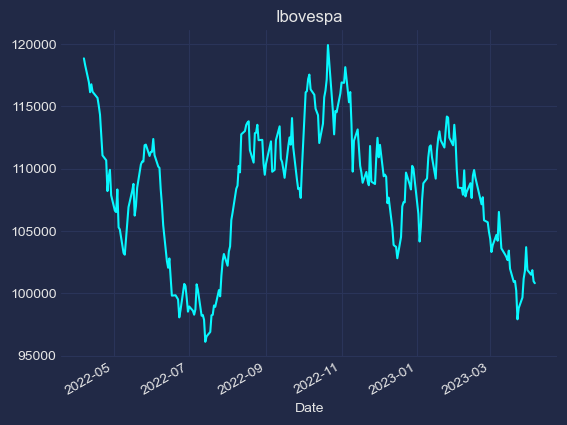

In [24]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Ibovespa', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

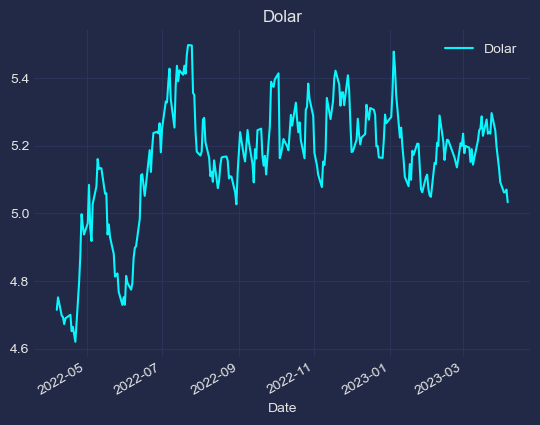

In [71]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Dolar', use_index = True, legend = True)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

In [26]:
import os
from dotenv import load_dotenv

In [32]:
load_dotenv()

True

In [62]:
senha = os.environ.get("senha")
email = 'mtulio0906@gmail.com'

In [68]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com Python"
msg['From'] = 'mtulio0906@gmail.com'
msg['To'] = 'flaviojf@gmail.com'

msg.set_content(f'''Fala pai, segue um relatório que eu gerei pelo Python:

Ibovespa: No ano, a Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%,
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar: No ano, a Ibovespa está tendo uma rentabilidade de {retorno_ano_dolar}%,
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do dólar foi de {retorno_dia_dolar}%.

:)

''')

In [69]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')    

In [70]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email,senha)
    smtp.send_message(msg)